This script summarizes and visualizes the missing link prediction predictive performance results across the food web database. 

Requires the following results folders: 'Results_Food_Webs_0', 'Results_Food_Webs_1', 'Results_Food_Webs_2', 'Results_Food_Webs_3', 'Results_Food_Webs_4', 'Results_Food_Webs_Aggregated'

Note this was run with Python 3.12.4, numpy 1.26.4, matplotlib 3.8.4, scipy 1.13.1, pandas 2.2.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import scipy.stats
import pickle
import summarize_results_food_webs
import string
import pandas as pd
FONT_SIZE = 17

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.font_manager as font_manager
font_dir = ['../../Helvetica']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
plt.rcParams['font.family'] = 'Helvetica'

# short (in processed data) to long name (in results files) dictionary
folder_shorter_names = {'Grand Caricaie Clmown1':'Grand Caricaie  marsh dominated by Cladietum marisci, mown  Clmown1',\
    'Grand Caricaie Clmown2': 'Grand Caricaie  marsh dominated by Cladietum marisci, mown  Clmown2',\
    'Grand Caricaie ClControl1': 'Grand Caricaie  marsh dominated by Cladietum marisci, not mown  ClControl1',\
    'Grand Caricaie ClControl2': 'Grand Caricaie  marsh dominated by Cladietum marisci, not mown  ClControl2',\
    'Grand Caricaie Scmown1': 'Grand Caricaie  marsh dominated by Schoenus nigricans, mown  Scmown1 ',\
    'Grand Caricaie Scmown2': 'Grand Caricaie  marsh dominated by Schoenus nigricans, mown  Scmown2 ',\
    'Grand Caricaie ScControl1': 'Grand Caricaie  marsh dominated by Schoenus nigricans, not mown  ScControl1 ',\
    'Grand Caricaie ScControl2': 'Grand Caricaie  marsh dominated by Schoenus nigricans, not mown  ScControl2 '}

In [ ]:
# Check we got through all of the results
num_it = 5
num_webs = 290
full_color = 'chocolate'
struc_color = 'olivedrab'
attr_color = 'cadetblue'

Data_Folder = 'Input_Data_Disaggregated_Lifestage'
# These results correspond to those on Input_Data_Disaggregated_Lifestage, Input_Data_Disaggregated_Lifestage_1, 
# Input_Data_Disaggregated_Lifestage_2, Input_Data_Disaggregated_Lifestage_3, Input_Data_Disaggregated_Lifestage_4
Results_Folders = ['Results_Food_Webs_0', 'Results_Food_Webs_1', 'Results_Food_Webs_2', 'Results_Food_Webs_3', 'Results_Food_Webs_4']
Figure_Folder = 'Figures'
Processing_Folder = 'Data_PreProcessing_Code_Disaggregated_Lifestage'

if not os.path.exists(Figure_Folder):
    os.mkdir(Figure_Folder)

for res_folder in Results_Folders:
    print(res_folder)
    ids_to_skip = summarize_results_food_webs.check_all_results(Data_Folder, res_folder)

Results_Food_Webs_0
count fully missing auc 0
count missing some auc results 0
count fully missing avp 0
count missing some avp results 0
food web ids to still run: []
Results_Food_Webs_1
count fully missing auc 0
count missing some auc results 0
count fully missing avp 0
count missing some avp results 0
food web ids to still run: []
Results_Food_Webs_2
count fully missing auc 0
count missing some auc results 0
count fully missing avp 0
count missing some avp results 0
food web ids to still run: []
Results_Food_Webs_3
count fully missing auc 0
count missing some auc results 0
count fully missing avp 0
count missing some avp results 0
food web ids to still run: []
Results_Food_Webs_4
count fully missing auc 0
count missing some auc results 0
count fully missing avp 0
count missing some avp results 0
food web ids to still run: []


In [4]:
for res_folder in Results_Folders:
    summarize_results_food_webs.food_web_result_to_file(Data_Folder, res_folder, num_it, ids_to_skip, folder_shorter_names)

 --------- ROC -------------------
individual t/t split structure under baseline: 30
individual t/t split attribute under baseline - 27
individual t/t split full under baseline - 14
avg for a web structure under baseline: 0
avg for a web attribute under baseline - 0
avg for a web full under baseline - 0
full std - 0.06
struc std - 0.06
attr std - 0.06
T test - difference in mean
------------------------
structure vs. attribute
t-statistic: 23.658
confidence interval: (0.055, 0.065)
Cohen's d avg: 0.965
Degrees of freedom: 289
p-value: 0.0
------------------------
full vs. attribute
t-statistic: 30.477
confidence interval: (0.066, 0.075)
Cohen's d avg: 1.215
Degrees of freedom: 289
p-value: 0.0
------------------------
full vs. structure
t-statistic: 11.584
confidence interval: (0.009, 0.012)
Cohen's d avg: 0.172
Degrees of freedom: 289
structure vs. attribute corrected p:  0.0 SIGNIFICANT ****
full vs. attribute corrected p: 0.0 SIGNIFICANT ****
full vs. structure corrected p: 0.0 SIGN

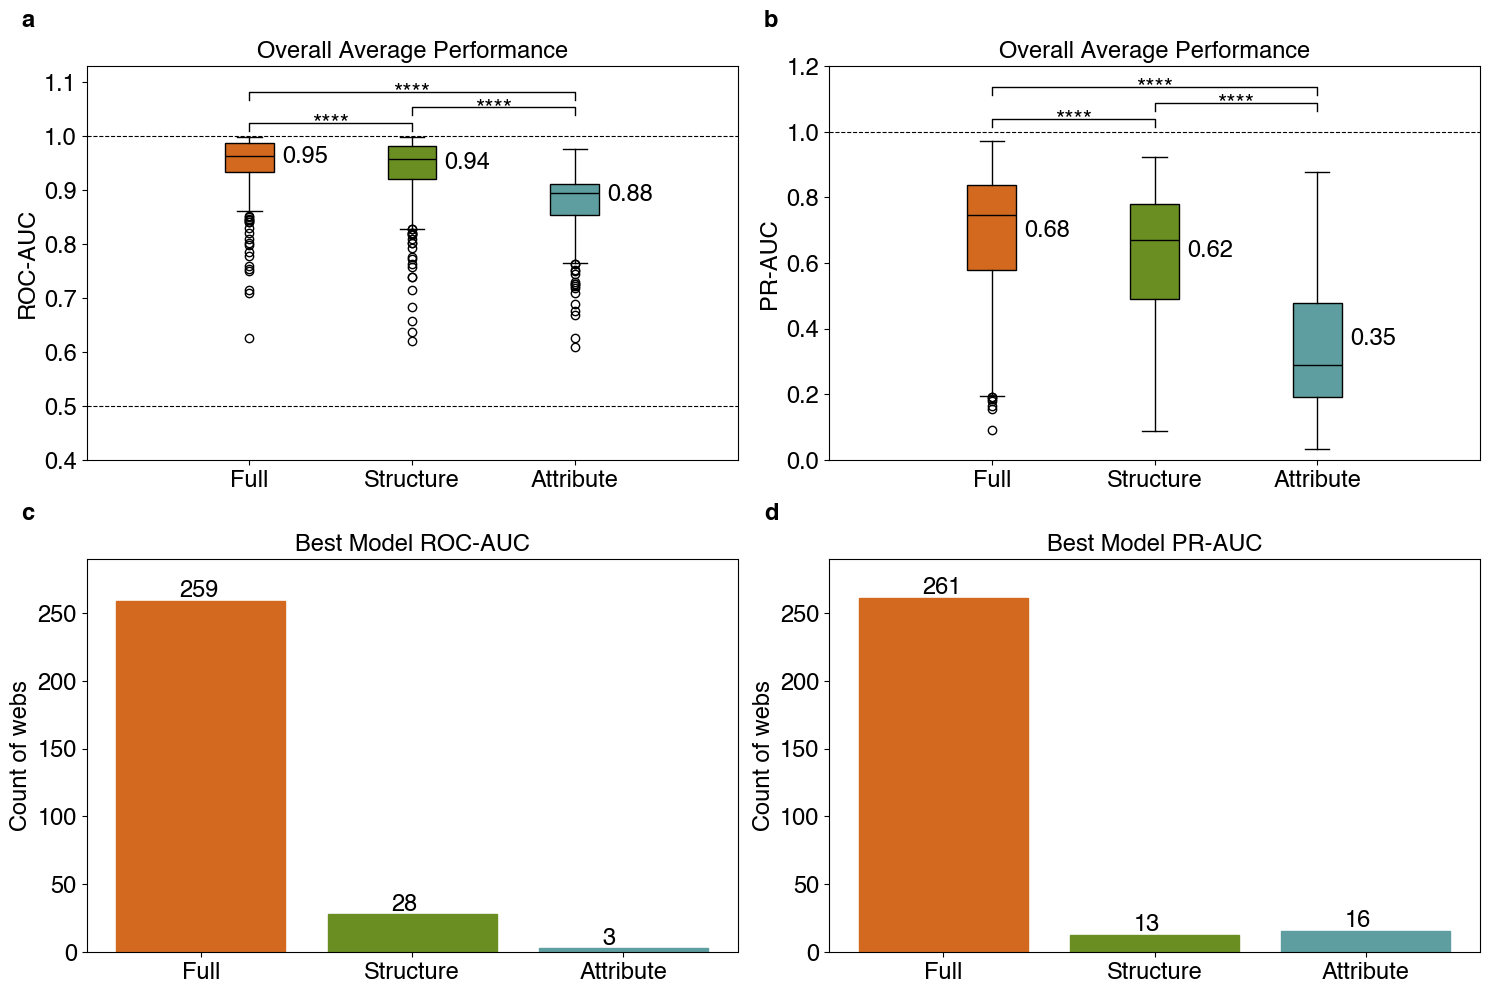

In [5]:
# ROC-AUC results
fig, ha = plt.subplots(2, 2, figsize=(15,10))
num_it = 25
sp = [(2,2,1),(2,2,3)]
summarize_results_food_webs.food_web_result_plots(Data_Folder, Results_Folders,[],'Overall Average Performance',\
                                                  'auc', 'ROC', num_it, True, True, sp, False, num_webs, folder_shorter_names, FONT_SIZE,\
                                                 full_color, struc_color, attr_color)
sp = [(2,2,2),(2,2,4)]
summarize_results_food_webs.food_web_result_plots(Data_Folder, Results_Folders, [],'Overall Average Performance',\
                                                  'avp', 'PR', num_it, True, True, sp, False, num_webs, folder_shorter_names, FONT_SIZE,\
                                                 full_color, struc_color, attr_color)

for n, ax in enumerate(ha.flat):
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, size=FONT_SIZE, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{Figure_Folder}/Food_Web_Database_Overall.pdf',dpi=1000,bbox_inches='tight')
plt.show()


Ecosystem Type: lakes
 --------- ROC -------------------
full std - 0.04
struc std - 0.04
attr std - 0.04
T test - difference in mean
------------------------
structure vs. attribute
t-statistic: 21.251
confidence interval: (0.073, 0.088)
Cohen's d avg: 1.848
Degrees of freedom: 54
p-value: 0.0
------------------------
full vs. attribute
t-statistic: 24.662
confidence interval: (0.083, 0.098)
Cohen's d avg: 2.234
Degrees of freedom: 54
p-value: 0.0
------------------------
full vs. structure
t-statistic: 4.187
confidence interval: (0.005, 0.015)
Cohen's d avg: 0.26
Degrees of freedom: 54
structure vs. attribute corrected p:  0.0 SIGNIFICANT ****
full vs. attribute corrected p: 0.0 SIGNIFICANT ****
full vs. structure corrected p: 0.0 SIGNIFICANT ***
1.0532899999999998
1.0313899999999998

Ecosystem Type: marine
 --------- ROC -------------------
full std - 0.06
struc std - 0.07
attr std - 0.07
T test - difference in mean
------------------------
structure vs. attribute
t-statistic: 12.4

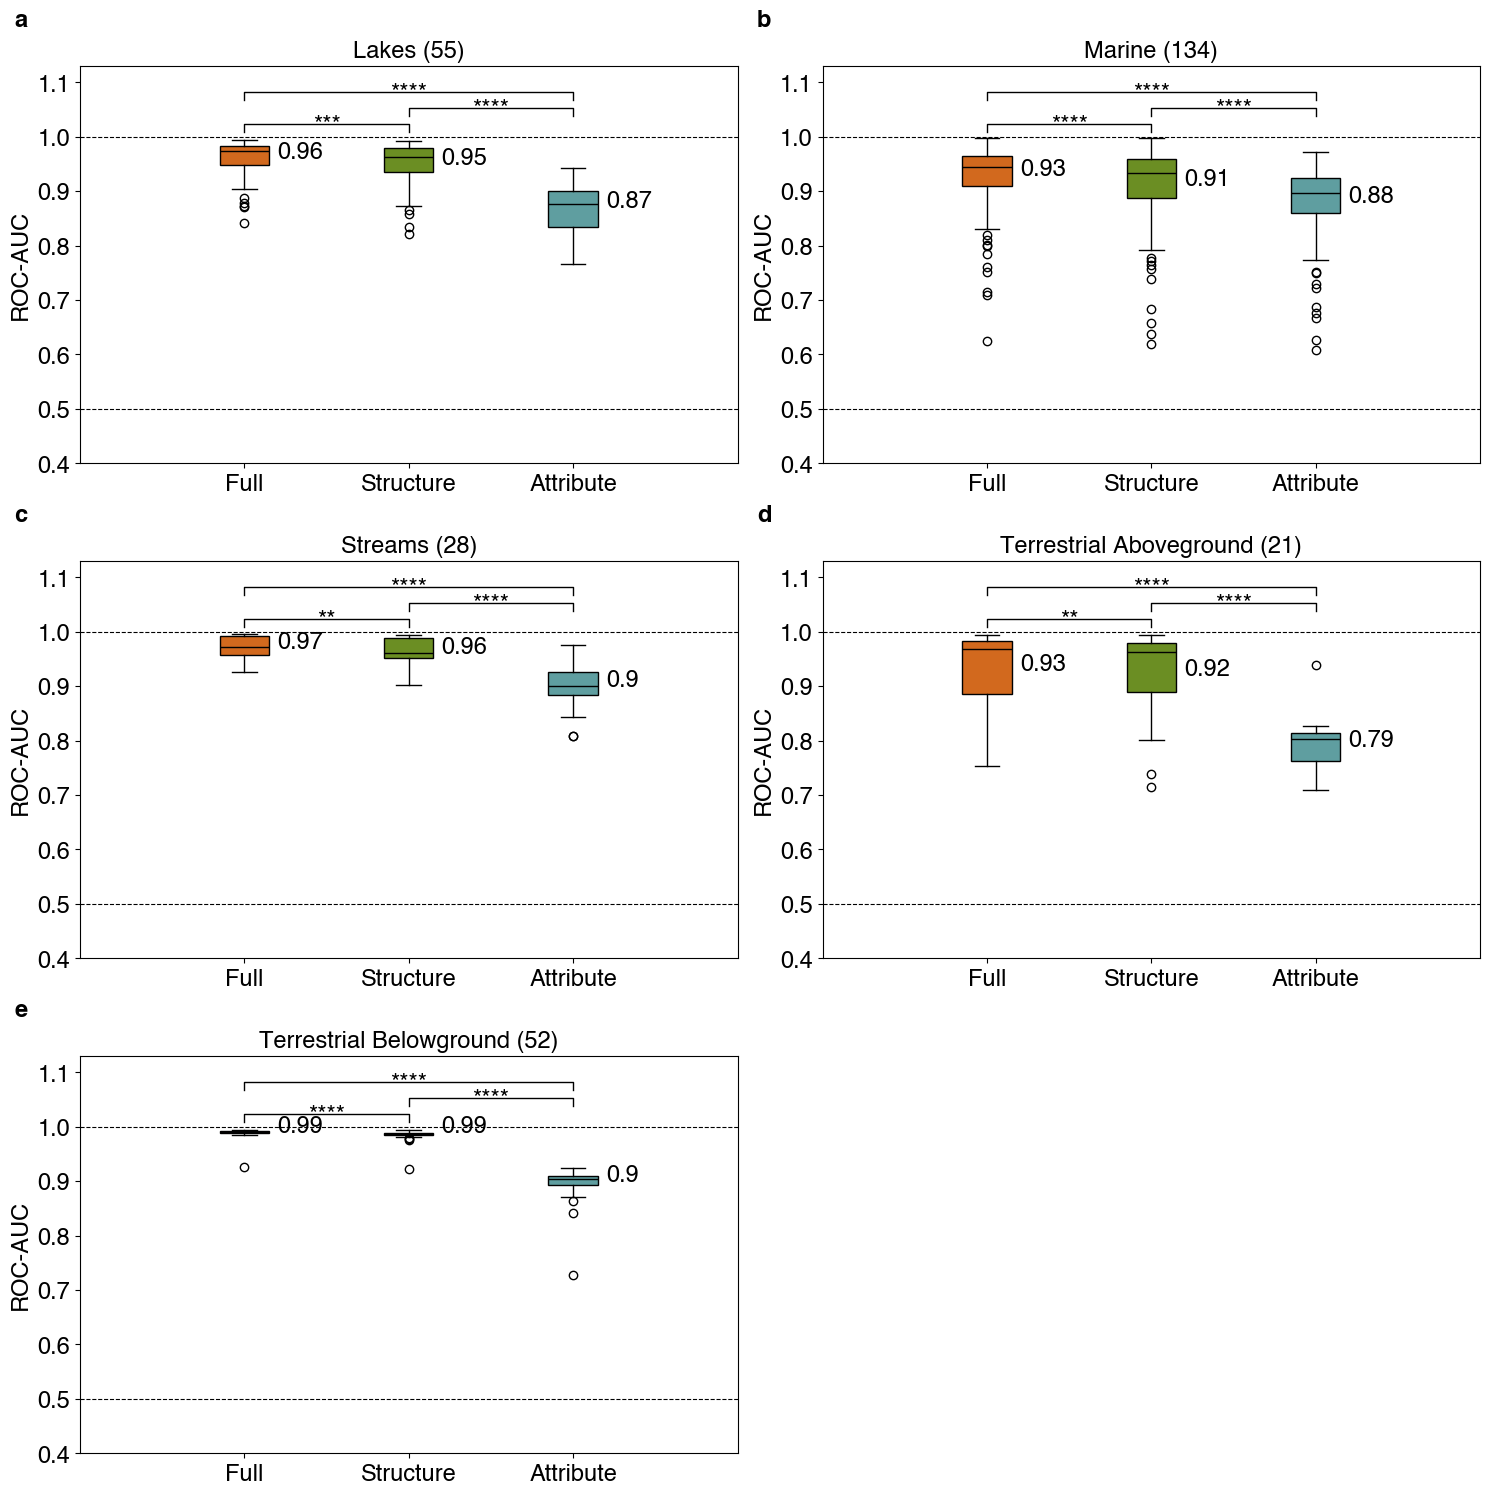

In [6]:
# ROC-AUC results, broken up by ecosystem type
fig, ha = plt.subplots(3, 2, figsize=(15,15))

num_it = 25
with open(os.path.join(Processing_Folder,'fw_metadata.pickle'), 'rb') as handle:
    fw_metadata = pickle.load(handle)
    
i = 1
for eco_type in ['lakes', 'marine','streams','terrestrial aboveground','terrestrial belowground']:
    ids_to_skip = []
    for fw in fw_metadata:
        if fw_metadata[fw]['ecosystem.type'] != eco_type:
            fw_id = str(fw_metadata[fw]['fw_id'])
            if fw_id not in ids_to_skip:
                ids_to_skip.append(fw_id)
    num_skip = len(ids_to_skip)
    print("")
    print(f"Ecosystem Type: {eco_type}")
    summarize_results_food_webs.food_web_result_plots(Data_Folder, Results_Folders, ids_to_skip, f'{eco_type} ({num_webs-num_skip})'.title(),\
                            'auc', 'ROC', num_it, False, True, [(3,2,i)], True, num_webs, folder_shorter_names, FONT_SIZE,\
                                                     full_color, struc_color, attr_color)
    i+=1
    
ha[-1,-1].axis('off')
for n, ax in enumerate(ha.flat[0:5]):
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, size=FONT_SIZE, weight='bold')
plt.tight_layout()
plt.savefig(f'{Figure_Folder}/Food_Web_ROC_AUC_Ecotype.pdf',dpi=1000,bbox_inches='tight')
plt.show()


Ecosystem Type: lakes
 --------- PR -------------------
full std - 0.14
struc std - 0.16
attr std - 0.09
T test - difference in mean
------------------------
structure vs. attribute
t-statistic: 16.218
confidence interval: (0.32, 0.41)
Cohen's d avg: 2.746
Degrees of freedom: 54
p-value: 0.0
------------------------
full vs. attribute
t-statistic: 23.26
confidence interval: (0.409, 0.486)
Cohen's d avg: 3.686
Degrees of freedom: 54
p-value: 0.0
------------------------
full vs. structure
t-statistic: 7.893
confidence interval: (0.062, 0.104)
Cohen's d avg: 0.532
Degrees of freedom: 54
structure vs. attribute corrected p:  0.0 SIGNIFICANT ****
full vs. attribute corrected p: 0.0 SIGNIFICANT ****
full vs. structure corrected p: 0.0 SIGNIFICANT ****
1.0876000000000001
1.0516

Ecosystem Type: marine
 --------- PR -------------------
full std - 0.19
struc std - 0.2
attr std - 0.21
T test - difference in mean
------------------------
structure vs. attribute
t-statistic: 7.256
confidence int

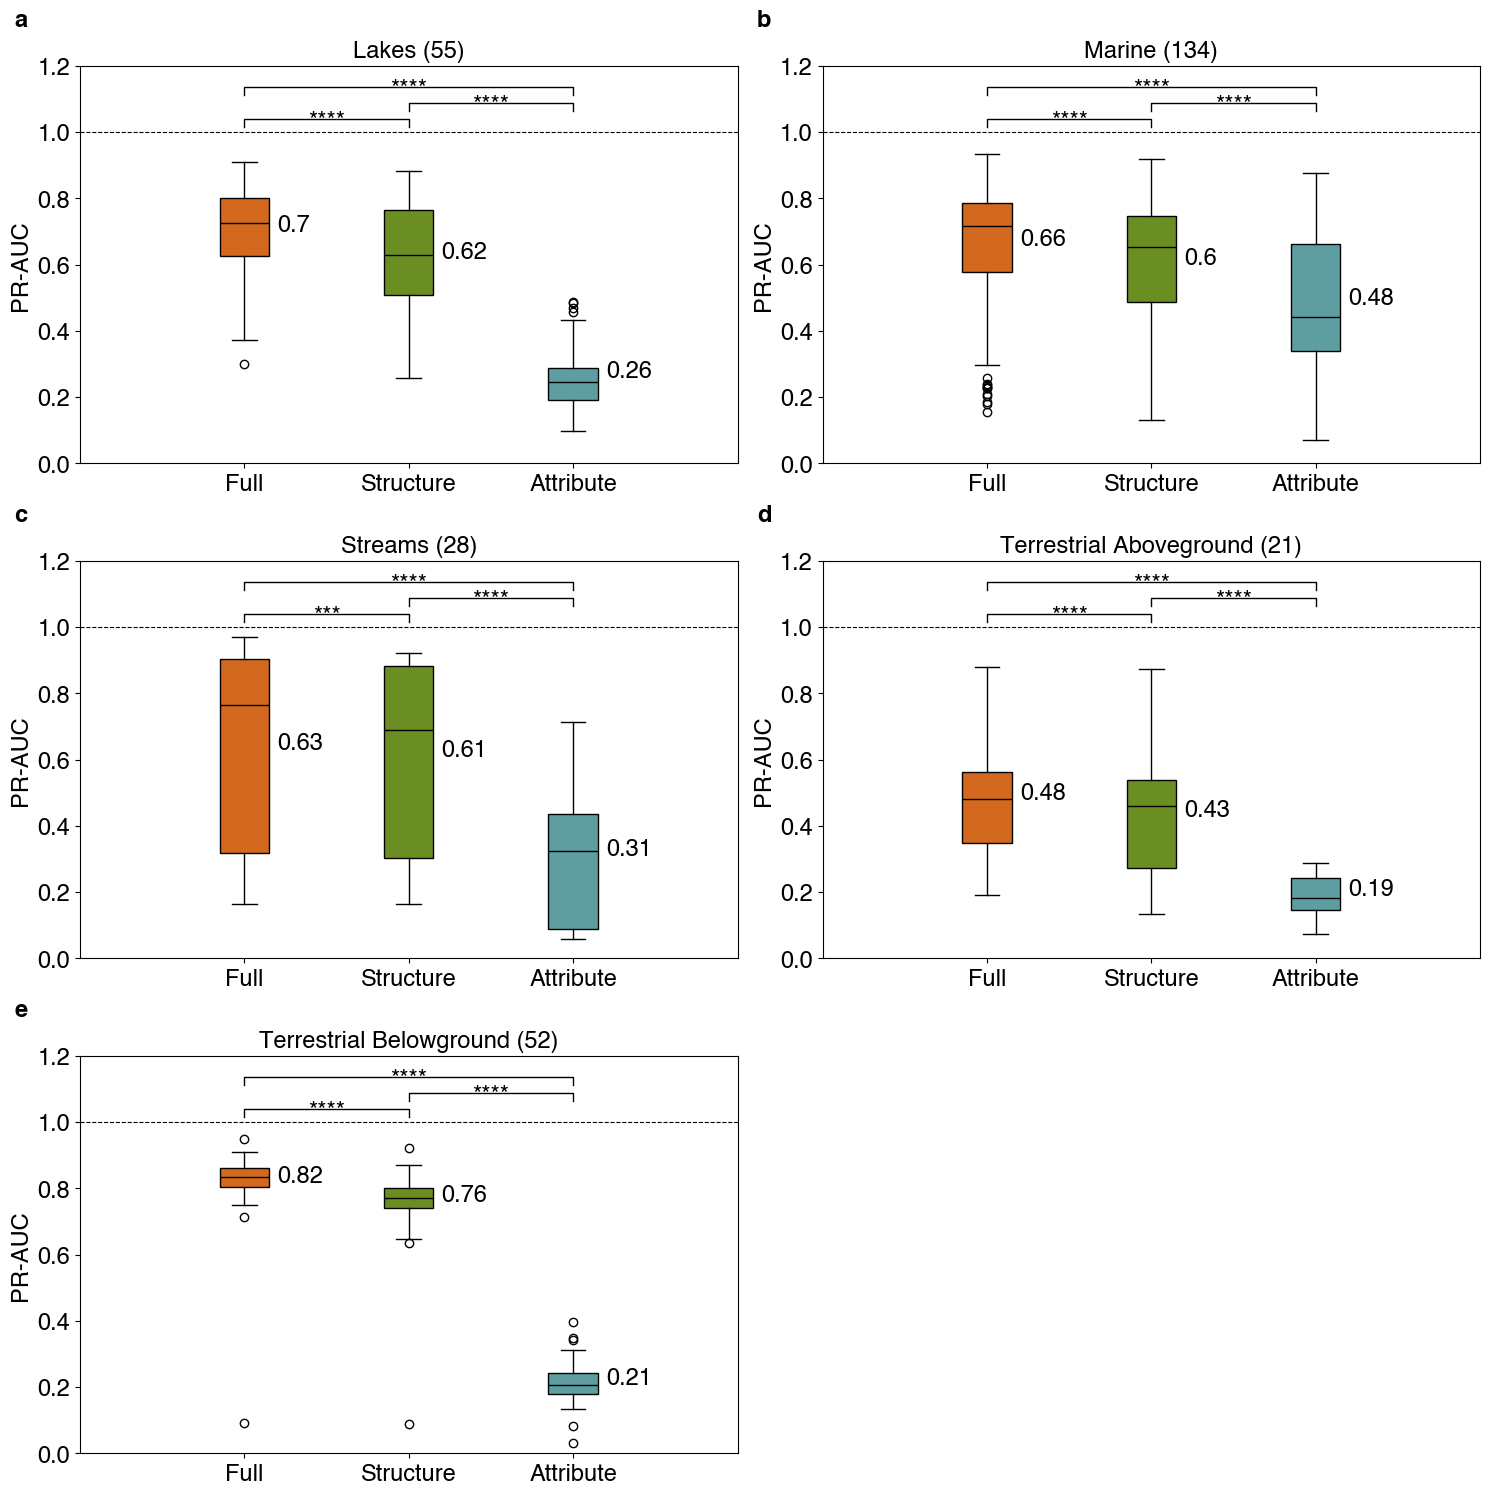

In [7]:
# PR-AUC results, broken up by ecosystem type
fig, ha = plt.subplots(3, 2, figsize=(15,15))

num_it = 25
with open(os.path.join(Processing_Folder,'fw_metadata.pickle'), 'rb') as handle:
    fw_metadata = pickle.load(handle)
    
i = 1
for eco_type in ['lakes', 'marine','streams','terrestrial aboveground','terrestrial belowground']:
    ids_to_skip = []
    for fw in fw_metadata:
        if fw_metadata[fw]['ecosystem.type'] != eco_type:
            fw_id = str(fw_metadata[fw]['fw_id'])
            if fw_id not in ids_to_skip:
                ids_to_skip.append(fw_id)
    num_skip = len(ids_to_skip)
    print("")
    print(f"Ecosystem Type: {eco_type}")
    summarize_results_food_webs.food_web_result_plots(Data_Folder, Results_Folders, ids_to_skip,\
                          f'{eco_type} ({num_webs-num_skip})'.title(), 'avp', 'PR', num_it,\
                                                      False, True,[(3,2,i)], True, num_webs, folder_shorter_names, FONT_SIZE,\
                                                     full_color, struc_color, attr_color)
    i+=1
    
ha[-1,-1].axis('off')
for n, ax in enumerate(ha.flat[0:5]):
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, size=FONT_SIZE, weight='bold')
plt.tight_layout()
plt.savefig(f'{Figure_Folder}/Food_Web_PR_AUC_Ecotype.pdf',dpi=1000,bbox_inches='tight')
plt.show()

In [ ]:
# Aggregated by life stage results
num_it = 5
num_webs = 290
Data_Folder_Aggregated = 'Input_Data_Aggregated_Lifestage'
Results_Folders_Aggregated = ['Results_Food_Webs_Aggregated']
ids_to_skip = summarize_results_food_webs.check_all_results(Data_Folder_Aggregated, Results_Folders_Aggregated[0])
summarize_results_food_webs.food_web_result_to_file(Data_Folder_Aggregated, Results_Folders_Aggregated[0], num_it, ids_to_skip, folder_shorter_names)

count fully missing auc 0
count missing some auc results 0
count fully missing avp 0
count missing some avp results 0
food web ids to still run: []


['8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '117', '118', '119', '120', '121', '122', '125', '126', '127', '128', '129', '130', '131', '132', '133', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '

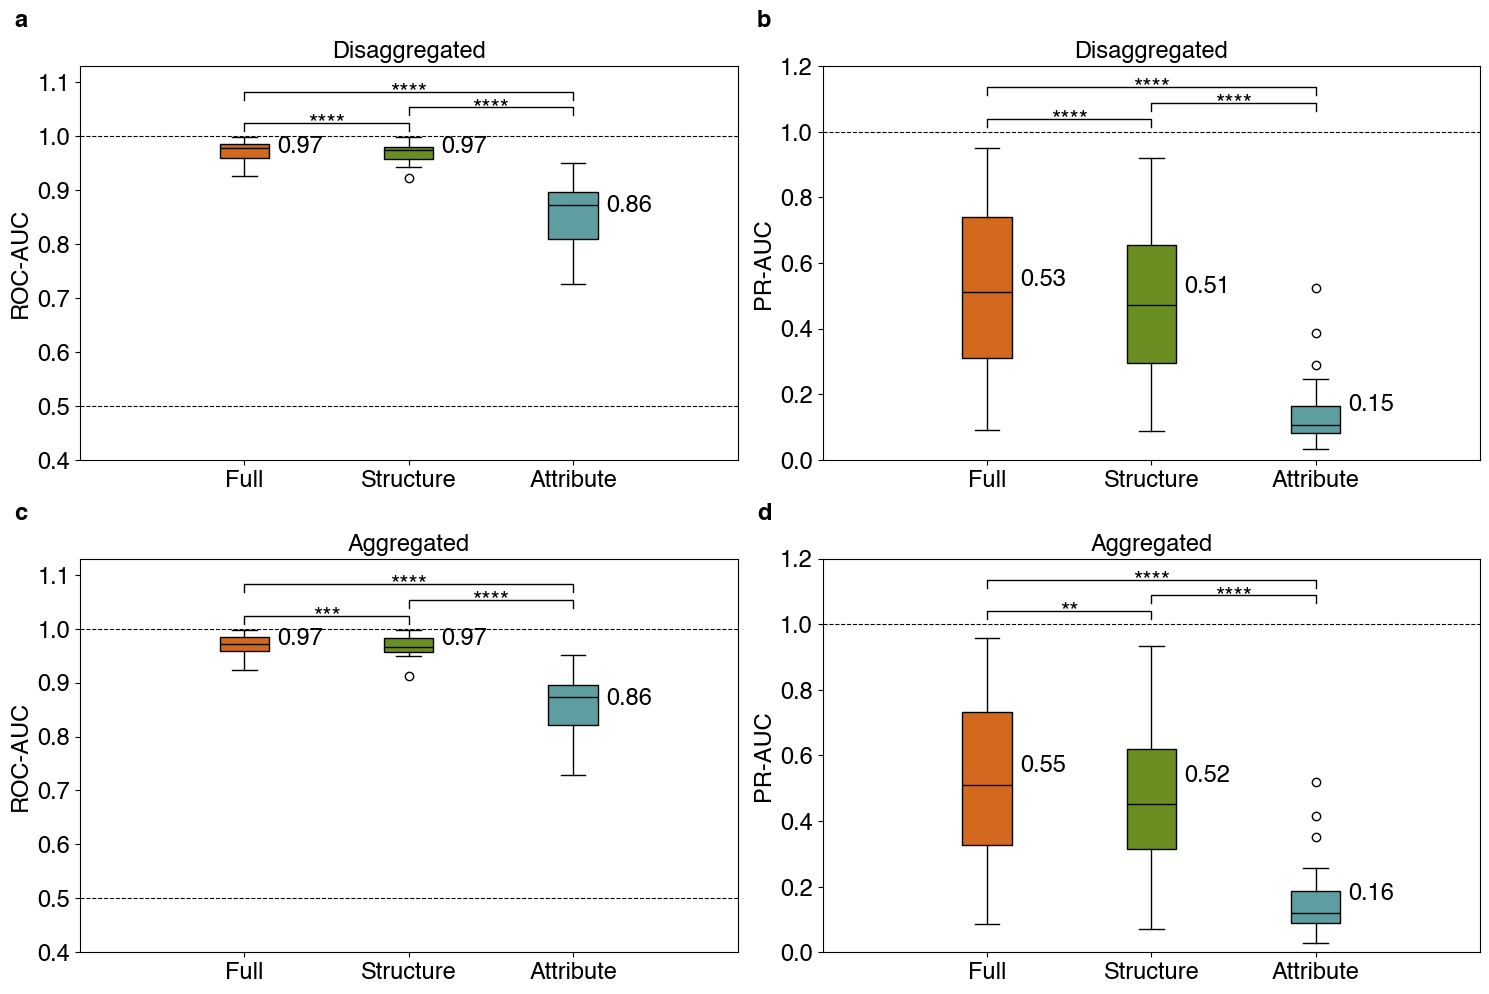

In [ ]:
# Results for the 25 food webs that change with aggregation
fig, ha = plt.subplots(2, 2, figsize=(15,10))
to_viz = ['Grand Caricaie  marsh dominated by Cladietum marisci, mown  Clmown1', 'Grand Caricaie  marsh dominated by Cladietum marisci, mown  Clmown2', 'Grand Caricaie  marsh dominated by Cladietum marisci, not mown  ClControl1', 'Grand Caricaie  marsh dominated by Cladietum marisci, not mown  ClControl2', 'Grand Caricaie  marsh dominated by Schoenus nigricans, mown  Scmown1 ', 'Grand Caricaie  marsh dominated by Schoenus nigricans, mown  Scmown2 ', 'Grand Caricaie  marsh dominated by Schoenus nigricans, not mown  ScControl1 ', 'Grand Caricaie  marsh dominated by Schoenus nigricans, not mown  ScControl2 ', 'Chesapeake Bay', 'Carpinteria', 'Hardknott Gill', 'Mill Stream', 'Gearagh', 'Dutch Microfauna food web PlotA', 'Dutch Microfauna food web PlotB', 'Dutch Microfauna food web PlotC', 'Broad Stream', 'Canton Creek', 'Dempsters Stream', 'German Creek', 'Healy Creek', 'Kye Burn', 'Little Kye Burn', 'Stony Stream', 'Skipwith Pond']
with open(os.path.join('Input_Data_Disaggregated_Lifestage','fw_ids.pickle'),'rb') as f:
    fw_ids_dis = pickle.load(f)
to_viz_ids_dis = []
for fw_name in to_viz:
        to_viz_ids_dis.append(fw_ids_dis[fw_name])
with open(os.path.join('Input_Data_Aggregated_Lifestage','fw_ids.pickle'),'rb') as f:
    fw_ids_agg = pickle.load(f)
to_viz_ids_agg = []
for fw_name in to_viz:
        to_viz_ids_agg.append(fw_ids_agg[fw_name])
assert to_viz_ids_dis == to_viz_ids_agg, "not same ids"

to_skip = []
for i in range(0,290):
    if i not in to_viz_ids_dis:
        to_skip.append(str(i))

print(to_skip)

# Disaggregated results, filtered down to that 25 - ROC AUC
summarize_results_food_webs.food_web_result_plots(Data_Folder, Results_Folders, to_skip,'Disaggregated',\
                      'auc', 'ROC', 25, True, True, [(2,2,1)], True, num_webs, folder_shorter_names, FONT_SIZE,\
                                                 full_color, struc_color, attr_color)

# Disaggregated results, filtered down to that 25 - PR AUC
summarize_results_food_webs.food_web_result_plots(Data_Folder, Results_Folders, to_skip,'Disaggregated',\
                      'avp', 'PR', 25, True, True, [(2,2,2)], True,  num_webs, folder_shorter_names, FONT_SIZE,\
                                                 full_color, struc_color, attr_color)

# Aggregated results, filtered down to that 25 - ROC AUC
summarize_results_food_webs.food_web_result_plots(Data_Folder_Aggregated, Results_Folders_Aggregated, to_skip,'Aggregated',\
                      'auc', 'ROC', 5, True, True, [(2,2,3)],True,  num_webs, folder_shorter_names, FONT_SIZE,\
                                                 full_color, struc_color, attr_color)

# Aggregated results, filtered down to that 25 - PR AUC
summarize_results_food_webs.food_web_result_plots(Data_Folder_Aggregated, Results_Folders_Aggregated, to_skip,'Aggregated',\
                      'avp', 'PR', 5, True, True, [(2,2,4)],True,  num_webs, folder_shorter_names, FONT_SIZE,\
                                                 full_color, struc_color, attr_color)

for n, ax in enumerate(ha.flat):
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, size=FONT_SIZE, weight='bold')
plt.tight_layout()
plt.savefig(f'{Figure_Folder}/Food_Web_Supplemental_Aggregated.pdf',dpi=1000,bbox_inches='tight')
plt.show()

In [10]:
# Combine all the summary results files into one (average across all iterations for a food web / model)
ct = 0 
for res in Results_Folders:
    if ct == 0:
        summary_df = pd.read_csv(os.path.join(res,f'food_web_lp_res_{res}.csv'))
    else:
        summary_df = pd.concat((summary_df, pd.read_csv(os.path.join(res,f'food_web_lp_res_{res}.csv'))))
    ct += 1
grouped_df = summary_df.groupby('net_id').mean()
grouped_df.to_csv(os.path.join('Summarized_Results',f'food_web_lp_res.csv'))

count fully missing auc 0
count missing some auc results 0
count fully missing avp 0
count missing some avp results 0
food web ids to still run: []
[]
 --------- ROC -------------------
full std - 0.08
struc std - 0.11
attr std - nan
------------------------
full vs. structure
t-statistic: 11.252
confidence interval: (0.024, 0.035)
Cohen's d avg: 0.306
Degrees of freedom: 289
full vs. structure corrected p: 0.0 SIGNIFICANT ****
 --------- PR -------------------
full std - 0.21
struc std - 0.22
attr std - nan
------------------------
full vs. structure
t-statistic: 11.658
confidence interval: (0.047, 0.066)
Cohen's d avg: 0.26
Degrees of freedom: 289
full vs. structure corrected p: 0.0 SIGNIFICANT ****


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


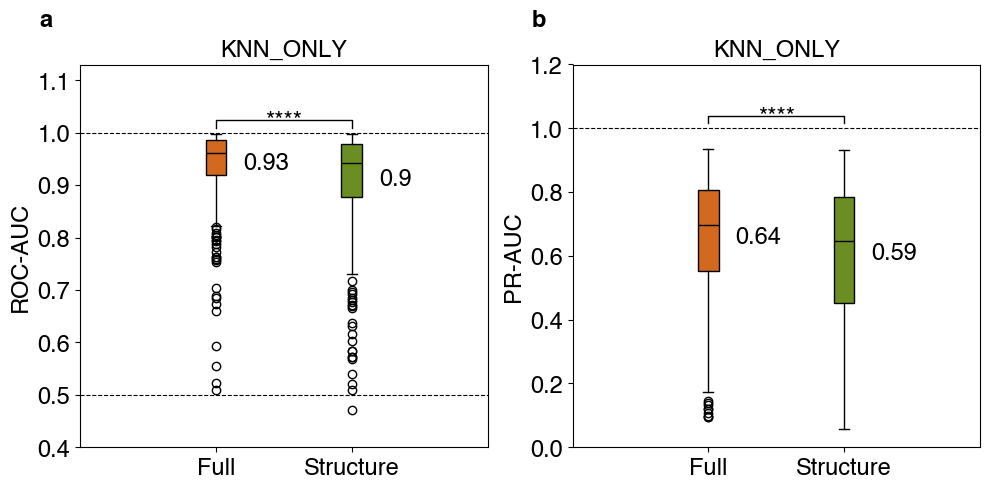

In [ ]:
# Results for the prediction with only KNN features

fig, ha = plt.subplots(1, 2, figsize=(10,5))
Data_Folder = 'Input_Data_Disaggregated_Lifestage'
Results_Folders = ['Results_Food_Webs_KNN']
Figure_Folder = 'Figures'

ids_to_skip = summarize_results_food_webs.check_all_results(Data_Folder, Results_Folders[0])
print(ids_to_skip)

summarize_results_food_webs.food_web_result_plots(Data_Folder, Results_Folders, [],'KNN_ONLY',\
                    'auc', 'ROC', 5, False, True, [(1,2,1)], True, 290, folder_shorter_names,\
                    FONT_SIZE, full_color, struc_color, attr_color, False)
summarize_results_food_webs.food_web_result_plots(Data_Folder, Results_Folders, [],'KNN_ONLY',\
                    'avp', 'PR', 5, False, True, [(1,2,2)], True, 290, folder_shorter_names,\
                    FONT_SIZE, full_color, struc_color, attr_color, False)

for n, ax in enumerate(ha.flat):
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, size=FONT_SIZE, weight='bold')
plt.tight_layout()
plt.savefig(f'{Figure_Folder}/Food_Web_Supplemental_KNN.pdf',dpi=1000,bbox_inches='tight')
plt.show()